<h3>Laporan Exploratory Data Analyst (EDA)<h3>

In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# memanggil data set lewat gdrive
path = "/content/drive/MyDrive/Exploratory_Data_Analyst/Pertemuan7/Tugas"

In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
file_name = list(uploaded.keys()) [0]
df = pd.read_csv(file_name)
# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1
# Tampilkan beberapa baris pertama DataFrame untuk memastikan data berhasil dimuat
display(df.head())

Saving salary_data.csv to salary_data.csv


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 1 to 6707
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB


In [ ]:
df.describe()

In [5]:
# Mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran dataset (baris, kolom):", df.shape)
# Mengecek jumlah total elemen dalam dataset
print("Jumlah total elemen:", df.size)

Ukuran dataset (baris, kolom): (6707, 6)
Jumlah total elemen: 40242


In [6]:
# Mengecek tipe data dari sebuah variabel
my_variable = "Hello"
print("Tipe data my_variable:", type(my_variable))
my_number = 123
print("Tipe data my_number:", type(my_number))
# Mengecek tipe data dari setiap kolom dalam DataFrame
print("\nTipe data setiap kolom dalam DataFrame:")
print(df.dtypes)


Tipe data my_variable: <class 'str'>
Tipe data my_number: <class 'int'>

Tipe data setiap kolom dalam DataFrame:
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [7]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [8]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, tampilkan beberapa baris duplikat pertama
if duplicate_rows_count > 0:
    print("\nBeberapa baris duplikat pertama:")
    display(df[df.duplicated(keep=False)].head())


Jumlah baris duplikat: 4913

Beberapa baris duplikat pertama:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
141,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
195,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
209,30,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0


In [9]:
# Statistik Deskriptif & Analisis Data

numerical_df = df.select_dtypes(include=['int64', 'float64'])

# hitung statistik deskriptif, meidan, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

descriptive_stats['Median'] = median_values
descriptive_stats['Mode'] = mode_values
descriptive_stats['MAD'] = mad_values
descriptive_stats['Range'] = range_values
descriptive_stats['Variance'] = variance_values

print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary,Median,Mode,MAD,Range,Variance
count,6707.000000,6705.000000,6703.000000,NaN,NaN,NaN,NaN,NaN
mean,33.623677,8.096346,115446.119200,NaN,NaN,NaN,NaN,NaN
std,7.621529,6.067248,53881.790154,NaN,NaN,NaN,NaN,NaN
min,21.000000,0.000000,350.000000,NaN,NaN,NaN,NaN,NaN
25%,28.000000,3.000000,70000.000000,NaN,NaN,NaN,NaN,NaN
50%,32.000000,7.000000,115000.000000,NaN,NaN,NaN,NaN,NaN
75%,38.000000,12.000000,160000.000000,NaN,NaN,NaN,NaN,NaN
max,62.000000,35.000000,1000000.000000,NaN,NaN,NaN,NaN,NaN


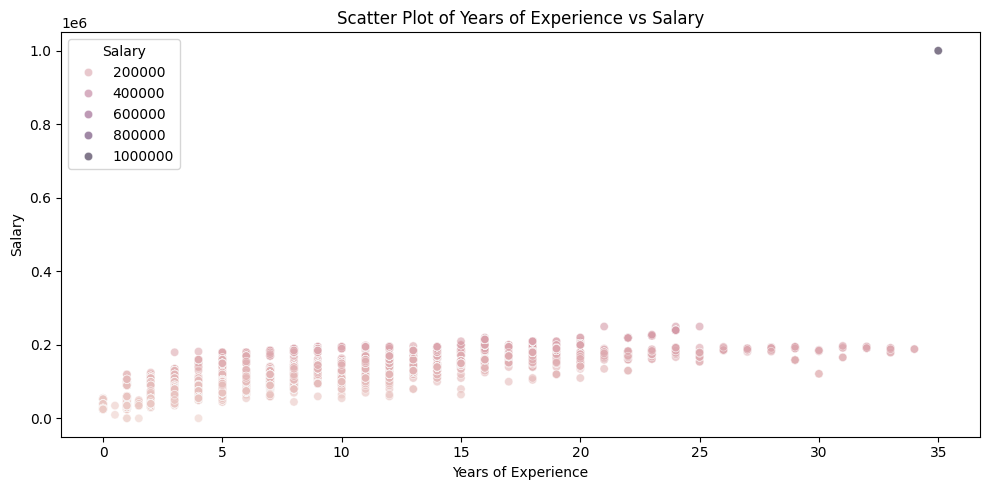

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# contoh visualisasi hubungan antar dua kolom numerik (scatter plot)
# kita bisa memilih kolom yang relevan, misalnya CGPA vs Academic Presure, diwarnai berdasar 'Depression'
numerical_cols_scatter = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], hue='Salary', alpha=0.6)
plt.title(f'Scatter Plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

In [11]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, hapus baris duplikat
if duplicate_rows_count > 0:
    print("\nMenghapus baris duplikat...")
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")

# Verifikasi bahwa tidak ada lagi baris duplikat
duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan duplikat
if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama DataFrame setelah penghapusan duplikat:")
    display(df.head())


Jumlah baris duplikat: 4913

Menghapus baris duplikat...
Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan duplikat:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [12]:
# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())


Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Gender
Gender
Male      971
Female    816
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    508
Master's Degree      447
PhD                  342
Bachelor's           263
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Intern                         1
Name: count, Length: 194, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,Age,Years of Experience,Salary
count,1794.000000,1792.000000,1790.000000
mean,35.140468,9.162109,113668.149162
std,8.232829,6.866281,55695.750262
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000



Distribusi kolom 'Education Level' setelah standardisasi:
Education Level
bachelor's degree    508
master's degree      447
phd                  343
bachelor's           263
master's             122
high school          110
Name: count, dtype: int64


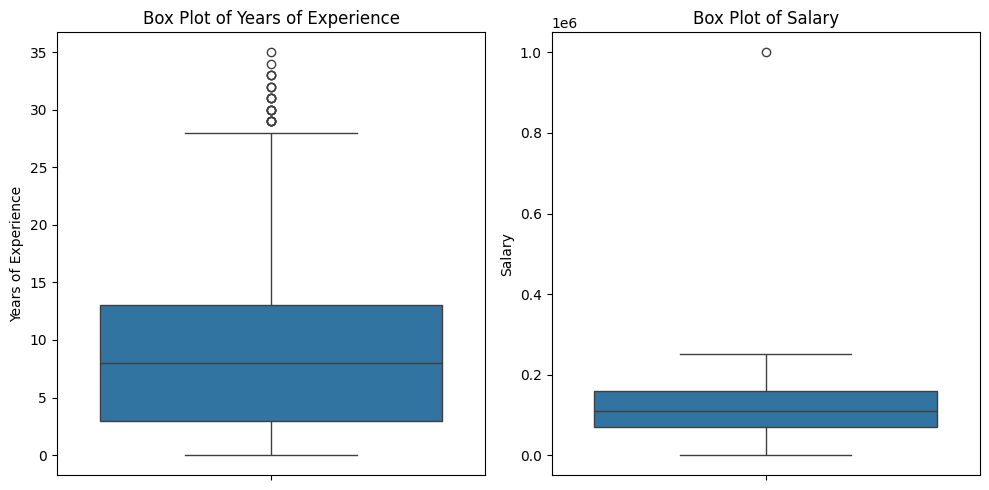

In [13]:
# Standardisasi kolom 'Kota'
df['Education Level'] = df['Education Level'].str.lower().str.strip()

# Verifikasi setelah standardisasi
print("\nDistribusi kolom 'Education Level' setelah standardisasi:")
print(df['Education Level'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi kolom numerik untuk mendeteksi outlier (Box Plot)
numerical_cols_outliers = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



Statistik deskriptif untuk 'Salary' setelah capping (upper limit = 20000000):


,Salary
count,1790.000000
mean,113668.149162
std,55695.750262
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,1000000.000000


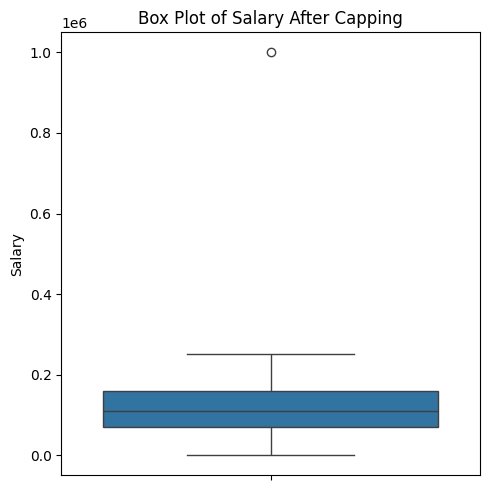

In [14]:
# Handle outliers in 'Pendapatan' using capping
# Determine a reasonable upper limit (e.g., based on the 95th percentile or visual inspection)
# From the describe output, the max is 8.6e7, while 75% is around 1.6e7.
# Let's cap at a value slightly above the 75th percentile, e.g., 30,000,000.
upper_limit = 20000000
df['Salary'] = df['Salary'].clip(upper=upper_limit)

print(f"\nStatistik deskriptif untuk 'Salary' setelah capping (upper limit = {upper_limit}):")
display(df['Salary'].describe())

# Visualisasi 'Pendapatan' setelah capping (Box Plot)
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='Salary')
plt.title('Box Plot of Salary After Capping')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


In [15]:
output_file_name = 'data_bersih_salary.xlsx'
df.to_excel(output_file_name, index=False)

print(f"DataFrame telah berhasil disimpan ke '{output_file_name}'")


DataFrame telah berhasil disimpan ke 'data_bersih_salary.xlsx'


In [16]:
# Hitung jumlah nilai yang hilang di kolom 'Status' sebelum penghapusan
missing_values_before_drop = df[['Job Title', 'Education Level', 'Salary', 'Years of Experience']].isnull().sum()
print(f"Jumlah nilai yang hilang di kolom 'Job Title', 'Education Level', 'Salary', 'Years of Experience' sebelum penghapusan:\n{missing_values_before_drop}")

# Hapus baris dengan nilai yang hilang di kolom 'Status'
df_dropped = df.dropna(subset=['Job Title', 'Education Level', 'Salary', 'Years of Experience']).copy()

# Verifikasi bahwa tidak ada lagi nilai yang hilang di kolom 'Status'
missing_values_after_drop = df_dropped[['Job Title', 'Education Level', 'Salary', 'Years of Experience']].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Job Title', 'Education Level', 'Salary', 'Years of Experience' setelah penghapusan:\n{missing_values_after_drop}")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan
print("\nBeberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:")
display(df_dropped.head())

print(f"\nUkuran DataFrame setelah penghapusan nilai yang hilang: {df_dropped.shape}")

Jumlah nilai yang hilang di kolom 'Job Title', 'Education Level', 'Salary', 'Years of Experience' sebelum penghapusan:
Job Title              1
Education Level        1
Salary                 4
Years of Experience    2
dtype: int64

Jumlah nilai yang hilang di kolom 'Job Title', 'Education Level', 'Salary', 'Years of Experience' setelah penghapusan:
Job Title              0
Education Level        0
Salary                 0
Years of Experience    0
dtype: int64

Beberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,bachelor's,Software Engineer,5.0,90000.0
2,28,Female,master's,Data Analyst,3.0,65000.0
4,36,Female,bachelor's,Sales Associate,7.0,60000.0
5,52,Male,master's,Director,20.0,200000.0
7,42,Female,master's,Product Manager,12.0,120000.0



Ukuran DataFrame setelah penghapusan nilai yang hilang: (1787, 6)


In [17]:
# Tentukan batas atas untuk outlier (sesuai dengan yang Anda gunakan sebelumnya)
upper_limit = 200000000 # Nilai ini adalah contoh; nilai sebenarnya pasti sudah ditentukan sebelumnya.

# Hitung jumlah baris sebelum penghapusan outlier
rows_before_drop = len(df)
print(f"Jumlah baris sebelum menghapus outlier: {rows_before_drop}")

# Hapus baris di mana 'Pendapatan' lebih besar dari batas atas
df_no_outliers = df[df['Salary'] <= upper_limit].copy()

# Hitung jumlah baris setelah penghapusan outlier
rows_after_drop = len(df_no_outliers)
print(f"\nJumlah baris setelah menghapus outlier di 'Salary': {rows_after_drop}")
print(f"Jumlah outlier yang dihapus: {rows_before_drop - rows_after_drop}")

# Tampilkan statistik deskriptif untuk 'Pendapatan' setelah penghapusan outlier
print("\nStatistik deskriptif untuk 'Salary' setelah menghapus outliers:")
display(df_no_outliers['Salary'].describe())

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan outlier
print("\nBeberapa baris pertama DataFrame setelah menghapus outlier:")
display(df_no_outliers.head())

Jumlah baris sebelum menghapus outlier: 1794

Jumlah baris setelah menghapus outlier di 'Salary': 1790
Jumlah outlier yang dihapus: 4

Statistik deskriptif untuk 'Salary' setelah menghapus outliers:


,Salary
count,1790.000000
mean,113668.149162
std,55695.750262
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,1000000.000000



Beberapa baris pertama DataFrame setelah menghapus outlier:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,bachelor's,Software Engineer,5.0,90000.0
2,28,Female,master's,Data Analyst,3.0,65000.0
3,45,Male,phd,Senior Manager,NaN,150000.0
4,36,Female,bachelor's,Sales Associate,7.0,60000.0
5,52,Male,master's,Director,20.0,200000.0


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv("salary_data.csv")

df = df.reset_index(drop=True)
df.index = df.index + 1

display(df.head())

correlation = df['Years of Experience'].corr(df['Salary'])
print(f"Korelasi antara Years of Experience dan Salary: {correlation}")

r_squared = correlation**2
print(f"Koefisien determinasi (R-squared) antara Years of Experience dan Salary: {r_squared} ")

TypeError: 'NoneType' object is not subscriptable